In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import font_manager, rc
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore")
rc("font", family="Arial Unicode MS")
plt.rcParams["axes.unicode_minus"] = False

In [33]:
raw_data = pd.read_csv('../data/globalterrorismdb_0617dist.csv', encoding="ISO-8859-1")
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [11]:
raw_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
terror = raw_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'target1', 'nkill', 'nwound', 'motive']]
terror.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,target1,nkill,nwound,motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN


In [34]:
terror.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                         'country_txt':'Country', 'region_txt':'Region', 'provstate':'Provstate', 'city':'City', 'latitude':'lat', 'longitude':'long',
                         'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType', 'target1':'Target', 'nkill':'kill', 'nwound':'wound', 'motive':'Motive'}, inplace=True)
terror.head()

,Year,Month,Day,Country,Region,Provstate,City,lat,long,AttackType,TargetType,Target,kill,wound,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN


## 문제1) 연도별 테러 발생 집계
• 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화하시오.  
• 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히 증가합니다. 이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이 있었는지를 추측해보세요.  
• 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.

In [16]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        170350 non-null  int64  
 1   Month       170350 non-null  int64  
 2   Day         170350 non-null  int64  
 3   Country     170350 non-null  object 
 4   Region      170350 non-null  object 
 5   Provstate   155848 non-null  object 
 6   City        169904 non-null  object 
 7   lat         165744 non-null  float64
 8   long        165744 non-null  float64
 9   AttackType  170350 non-null  object 
 10  TargetType  170350 non-null  object 
 11  Target      169714 non-null  object 
 12  kill        160668 non-null  float64
 13  wound       155025 non-null  float64
 14  Motive      48586 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 19.5+ MB


In [24]:
terror['Year'].value_counts()

2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: Year, dtype: int64

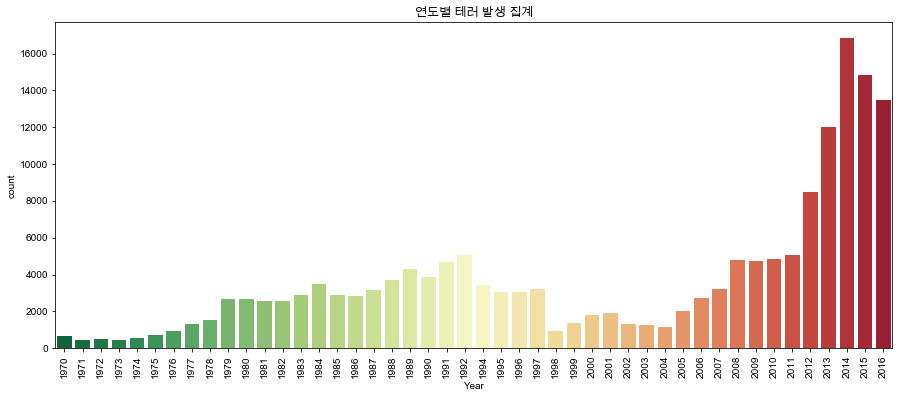

In [42]:
plt.subplots(figsize=(15,6))
sns.countplot('Year', data=terror, palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('연도별 테러 발생 집계')
plt.show()

- 2012~2014 : 테러 발생 급격히 증가
- 테러가 증가하는 주요 원인은 중동 지역 간 분쟁 증가, 전쟁 도구로 테러 활용, 경제 문제에 대한 불만 고조 등이 꼽힌다.
- 2013 세계경제는 유럽재정위기의 심화, 중국과 미국의 경기부진으로 글로벌 금융위기 직후인 2009년 이래 가장 나쁜 상황

## 문제2)
- 전세계 테러데이터를 가지고,테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화하세요.

In [61]:
terror['Country'].value_counts()

Iraq                22130
Pakistan            13634
Afghanistan         11306
India               10978
Colombia             8163
                    ...  
Andorra                 1
Falkland Islands        1
South Vietnam           1
New Hebrides            1
Vatican City            1
Name: Country, Length: 205, dtype: int64

In [81]:
terror_count = terror.groupby(by=['Country'], as_index=False).count()
terror_count.head()

,Country,Year,Month,Day,Region,Provstate,City,lat,long,AttackType,TargetType,Target,kill,wound,Motive
0,Afghanistan,11306,11306,11306,11306,11304,11165,11219,11219,11306,11306,11290,11016,10675,3496
1,Albania,79,79,79,79,24,79,78,78,79,79,77,75,75,17
2,Algeria,2729,2729,2729,2729,1583,2721,2596,2596,2729,2729,2694,2705,2616,1507
3,Andorra,1,1,1,1,1,1,0,0,1,1,1,0,0,0
4,Angola,493,493,493,493,493,493,459,459,493,493,489,478,459,126


In [200]:
terror_sum = terror.groupby(by=['Country'], as_index=False).sum()
terror_sum.head()

,Country,Year,Month,Day,lat,long,kill,wound
0,Afghanistan,22751019,74654,177687,379509.493024,753509.084091,33146.0,38228.0
1,Albania,157908,511,1352,3203.050428,1547.761581,42.0,126.0
2,Algeria,5459159,17700,41423,94032.311389,8816.484177,11091.0,9064.0
3,Andorra,1974,7,14,0.000000,0.000000,0.0,0.0
4,Angola,982349,3315,6673,-4645.699626,6870.500216,3036.0,2044.0


In [201]:
terror_top = terror_count[['Country', 'Year']]
terror_top.rename(columns = {'Year':'counts'}, inplace=True)
terror_top.head()

,Country,counts
0,Afghanistan,11306
1,Albania,79
2,Algeria,2729
3,Andorra,1
4,Angola,493


In [202]:
terror_top[['kill', 'wound']] = terror_sum[['kill', 'wound']]

In [203]:
terror_top.sort_values(by=['counts'], ascending=False, inplace=True)
terror_top = terror_top.head(10)
terror_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 84 to 183
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10 non-null     object 
 1   counts   10 non-null     int64  
 2   kill     10 non-null     float64
 3   wound    10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 400.0+ bytes


In [204]:
terror_top.head()

,Country,counts,kill,wound
84,Iraq,22130,71082.0,129437.0
134,Pakistan,13634,22734.0,39925.0
0,Afghanistan,11306,33146.0,38228.0
80,India,10978,18842.0,28241.0
35,Colombia,8163,14600.0,10199.0


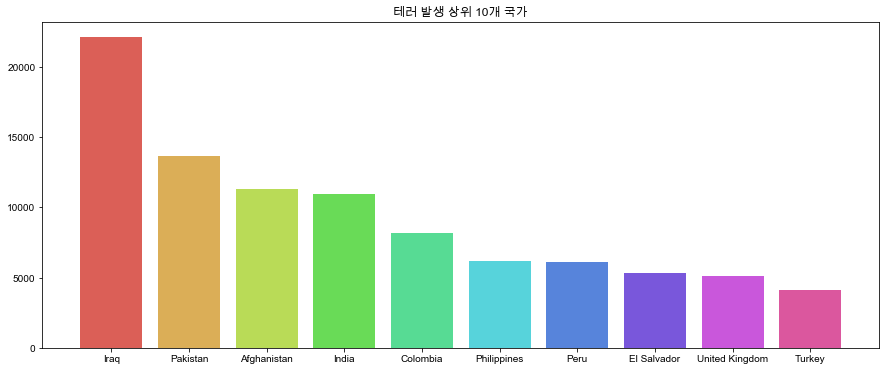

In [205]:
colors = sns.color_palette('hls', 10)

plt.figure(figsize=(15,6))
plt.title('테러 발생 상위 10개 국가')
plt.bar(terror_top['Country'], terror_top['counts'], color=colors)
plt.show()

## 문제3
• 문제2의 전세계 테러가 일어난 횟수별 상위 10개 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.  
• 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.  
• 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다.

In [206]:
terror_top.head()

,Country,counts,kill,wound
84,Iraq,22130,71082.0,129437.0
134,Pakistan,13634,22734.0,39925.0
0,Afghanistan,11306,33146.0,38228.0
80,India,10978,18842.0,28241.0
35,Colombia,8163,14600.0,10199.0


In [207]:
terror_top['casualty'] = terror_top['kill'] + terror_top['wound']
terror_top.head()

,Country,counts,kill,wound,casualty
84,Iraq,22130,71082.0,129437.0,200519.0
134,Pakistan,13634,22734.0,39925.0,62659.0
0,Afghanistan,11306,33146.0,38228.0,71374.0
80,India,10978,18842.0,28241.0,47083.0
35,Colombia,8163,14600.0,10199.0,24799.0


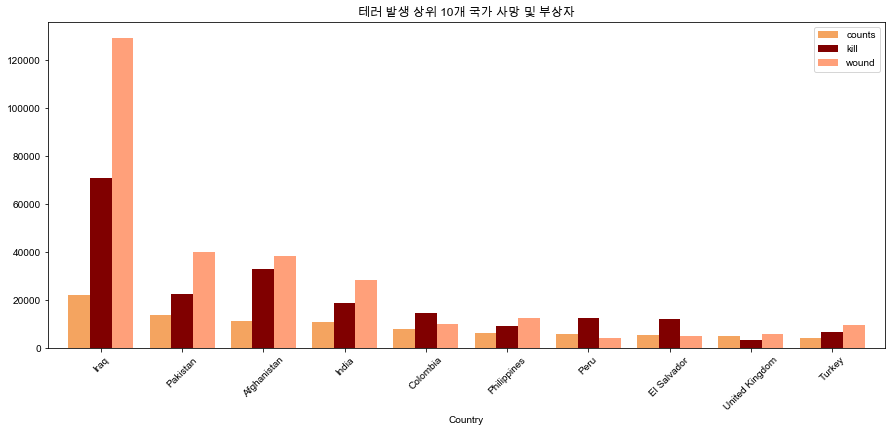

In [208]:
colors = ['#F4A460', '#800000', '#FFA07A']

terror_top.plot(x='Country', y=['counts','kill','wound'], kind='bar', figsize=(15,6), rot=45, color=colors, width=0.8)
plt.title('테러 발생 상위 10개 국가 사망 및 부상자');

- 전체적으로 테러 발생 횟수보다 사망자와 부상자 수가 많다
- Iraq의 경우 테러 발생 횟수의 6배 수치에 달하는 부상자 발생

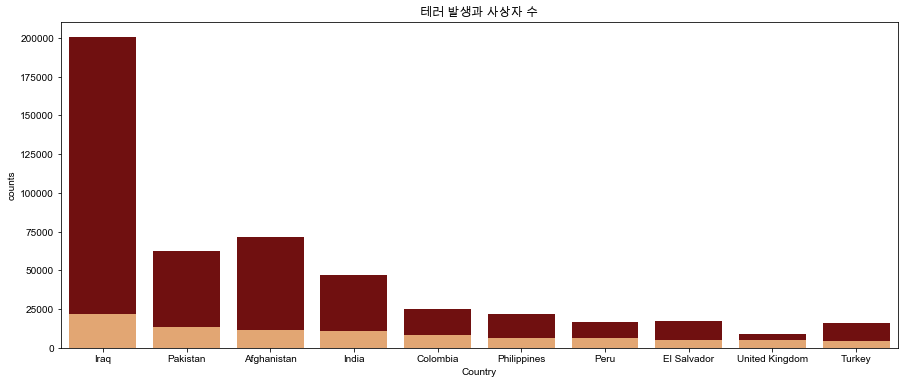

In [209]:
plt.figure(figsize=(15,6))
plt.title('테러 발생과 사상자 수')

sns.barplot(terror_top['Country'], terror_top['casualty'], data=terror_top, color='#800000')
sns.barplot(terror_top['Country'], terror_top['counts'], data=terror_top, color='#F4A460')

plt.show()

- 이라크에서 유독 크게 사상자가 발생했다
- 산발적인 테러발생 혹은 광장 같은 불특정 다수의 통행이 많은 곳에서 테러를 자주 일으킨다는 추측

## 문제4)
• 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 각 지역별로 테러공격형태, 사망자와 사상자의 수 등에 대해 각지역별로 특성들이 있는지를 확인하세요  
• 여러분들은 데이터를 충분히 관찰하며서 신중하게 결과를 정리하세요

In [146]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        170350 non-null  int64  
 1   Month       170350 non-null  int64  
 2   Day         170350 non-null  int64  
 3   Country     170350 non-null  object 
 4   Region      170350 non-null  object 
 5   Provstate   155848 non-null  object 
 6   City        169904 non-null  object 
 7   lat         165744 non-null  float64
 8   long        165744 non-null  float64
 9   AttackType  170350 non-null  object 
 10  TargetType  170350 non-null  object 
 11  Target      169714 non-null  object 
 12  kill        160668 non-null  float64
 13  wound       155025 non-null  float64
 14  Motive      48586 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 19.5+ MB


In [145]:
terror['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [148]:
main = ['Middle East & North Africa', 
        'South Asia', 'Southeast Asia', 'East Asia',
        'South America', 'North America', 
        'Western Europe', 'Eastern Europe'
       ]

In [147]:
terror_main = terror[['Year', 'Region', 'AttackType', 'TargetType', 'kill', 'wound']]
terror_main.head()

,Year,Region,AttackType,TargetType,kill,wound
0,1970,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0
1,1970,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0
2,1970,Southeast Asia,Assassination,Journalists & Media,1.0,0.0
3,1970,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN
4,1970,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN


In [154]:
terror_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        170350 non-null  int64  
 1   Region      170350 non-null  object 
 2   AttackType  170350 non-null  object 
 3   TargetType  170350 non-null  object 
 4   kill        160668 non-null  float64
 5   wound       155025 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.8+ MB


In [156]:
len(terror_main[terror_main['Region'] == main[0]])

46511

In [163]:
africa = terror_main[terror_main['Region'] == main[0]]
africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46511 entries, 95 to 170337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        46511 non-null  int64  
 1   Region      46511 non-null  object 
 2   AttackType  46511 non-null  object 
 3   TargetType  46511 non-null  object 
 4   kill        44485 non-null  float64
 5   wound       43254 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ MB


In [159]:
southasia = terror_main[terror_main['Region'] == main[1]]
souhteastasia = terror_main[terror_main['Region'] == main[2]]
eastasia = terror_main[terror_main['Region'] == main[3]]
southameria = terror_main[terror_main['Region'] == main[4]]
northamerica = terror_main[terror_main['Region'] == main[5]]
westerneurope = terror_main[terror_main['Region'] == main[6]]
easterneurope = terror_main[terror_main['Region'] == main[7]]

In [162]:
terror_country = pd.concat([africa, southasia])
terror_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88008 entries, 95 to 170344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        88008 non-null  int64  
 1   Region      88008 non-null  object 
 2   AttackType  88008 non-null  object 
 3   TargetType  88008 non-null  object 
 4   kill        85160 non-null  float64
 5   wound       83055 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.7+ MB


In [182]:
easterneurope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 15 to 170268
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5031 non-null   int64  
 1   Region      5031 non-null   object 
 2   AttackType  5031 non-null   object 
 3   TargetType  5031 non-null   object 
 4   kill        4863 non-null   float64
 5   wound       4778 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 275.1+ KB


In [183]:
terror_country = pd.concat([terror_country, easterneurope])

In [195]:
terror_country['casualty'] = terror_country['kill'] + terror_country['wound']

In [198]:
terror_country.tail()

,Year,Region,AttackType,TargetType,kill,wound,casualty
169985,2016,Eastern Europe,Armed Assault,Military,15.0,8.0,23.0
170177,2016,Eastern Europe,Unknown,Police,2.0,1.0,3.0
170178,2016,Eastern Europe,Unknown,Police,0.0,0.0,0.0
170255,2016,Eastern Europe,Bombing/Explosion,Government (General),0.0,0.0,0.0
170268,2016,Eastern Europe,Armed Assault,Police,3.0,0.0,3.0


In [186]:
terror_country['Region'].unique()

array(['Middle East & North Africa', 'South Asia', 'Southeast Asia',
       'East Asia', 'South America', 'North America', 'Western Europe',
       'Eastern Europe'], dtype=object)

#### 지역별 테러 공격 형태 시각화

In [189]:
attack = pd.crosstab(terror_country.Region,terror_country.AttackType)
attack

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
East Asia,114,55,327,198,18,3,14,42,23
Eastern Europe,1254,386,2720,239,26,20,216,57,113
Middle East & North Africa,8740,4060,28314,1049,126,87,2417,164,1554
North America,406,237,1528,872,18,63,121,69,32
South America,3824,2713,8977,776,66,229,1378,47,752
South Asia,10604,3967,19834,1898,85,100,3002,279,1728
Southeast Asia,3736,1237,4476,838,43,47,669,23,384
Western Europe,1657,2909,8424,2513,63,86,269,126,260


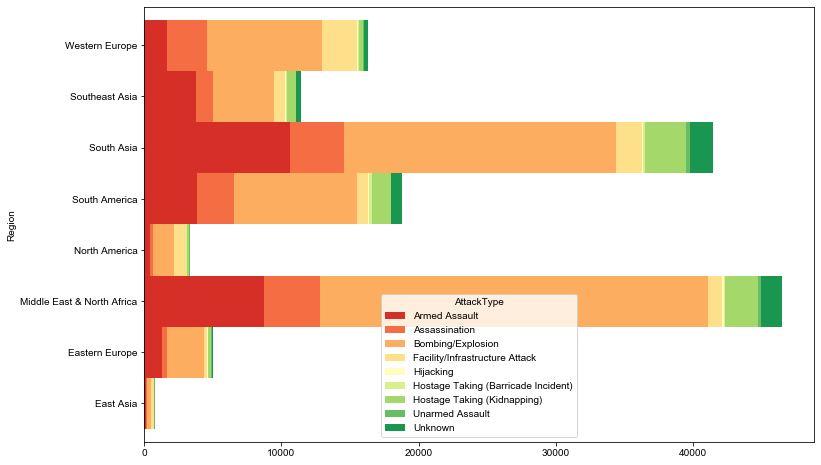

In [191]:
attack.plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

- 대체로 폭발 테러가 가장 많고 그 다음으로 무장 습격이 많다.
- Middle East&North Africa 가 가장 테러가 많이 발생하고 그 다음은 south Asia이다.

In [229]:
attack2 = pd.crosstab(terror_country.AttackType,terror_country.Region)
attack2

Region,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
AttackType,,,,,,,,
Armed Assault,114,1254,8740,406,3824,10604,3736,1657
Assassination,55,386,4060,237,2713,3967,1237,2909
Bombing/Explosion,327,2720,28314,1528,8977,19834,4476,8424
Facility/Infrastructure Attack,198,239,1049,872,776,1898,838,2513
Hijacking,18,26,126,18,66,85,43,63
Hostage Taking (Barricade Incident),3,20,87,63,229,100,47,86
Hostage Taking (Kidnapping),14,216,2417,121,1378,3002,669,269
Unarmed Assault,42,57,164,69,47,279,23,126
Unknown,23,113,1554,32,752,1728,384,260


In [231]:
attack2.iloc[:, 0]

AttackType
Armed Assault                          114
Assassination                           55
Bombing/Explosion                      327
Facility/Infrastructure Attack         198
Hijacking                               18
Hostage Taking (Barricade Incident)      3
Hostage Taking (Kidnapping)             14
Unarmed Assault                         42
Unknown                                 23
Name: East Asia, dtype: int64

In [245]:
country = attack2.columns
country

Index(['East Asia', 'Eastern Europe', 'Middle East & North Africa',
       'North America', 'South America', 'South Asia', 'Southeast Asia',
       'Western Europe'],
      dtype='object', name='Region')

In [235]:
label = attack2.index
label

Index(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'Unknown'],
      dtype='object', name='AttackType')

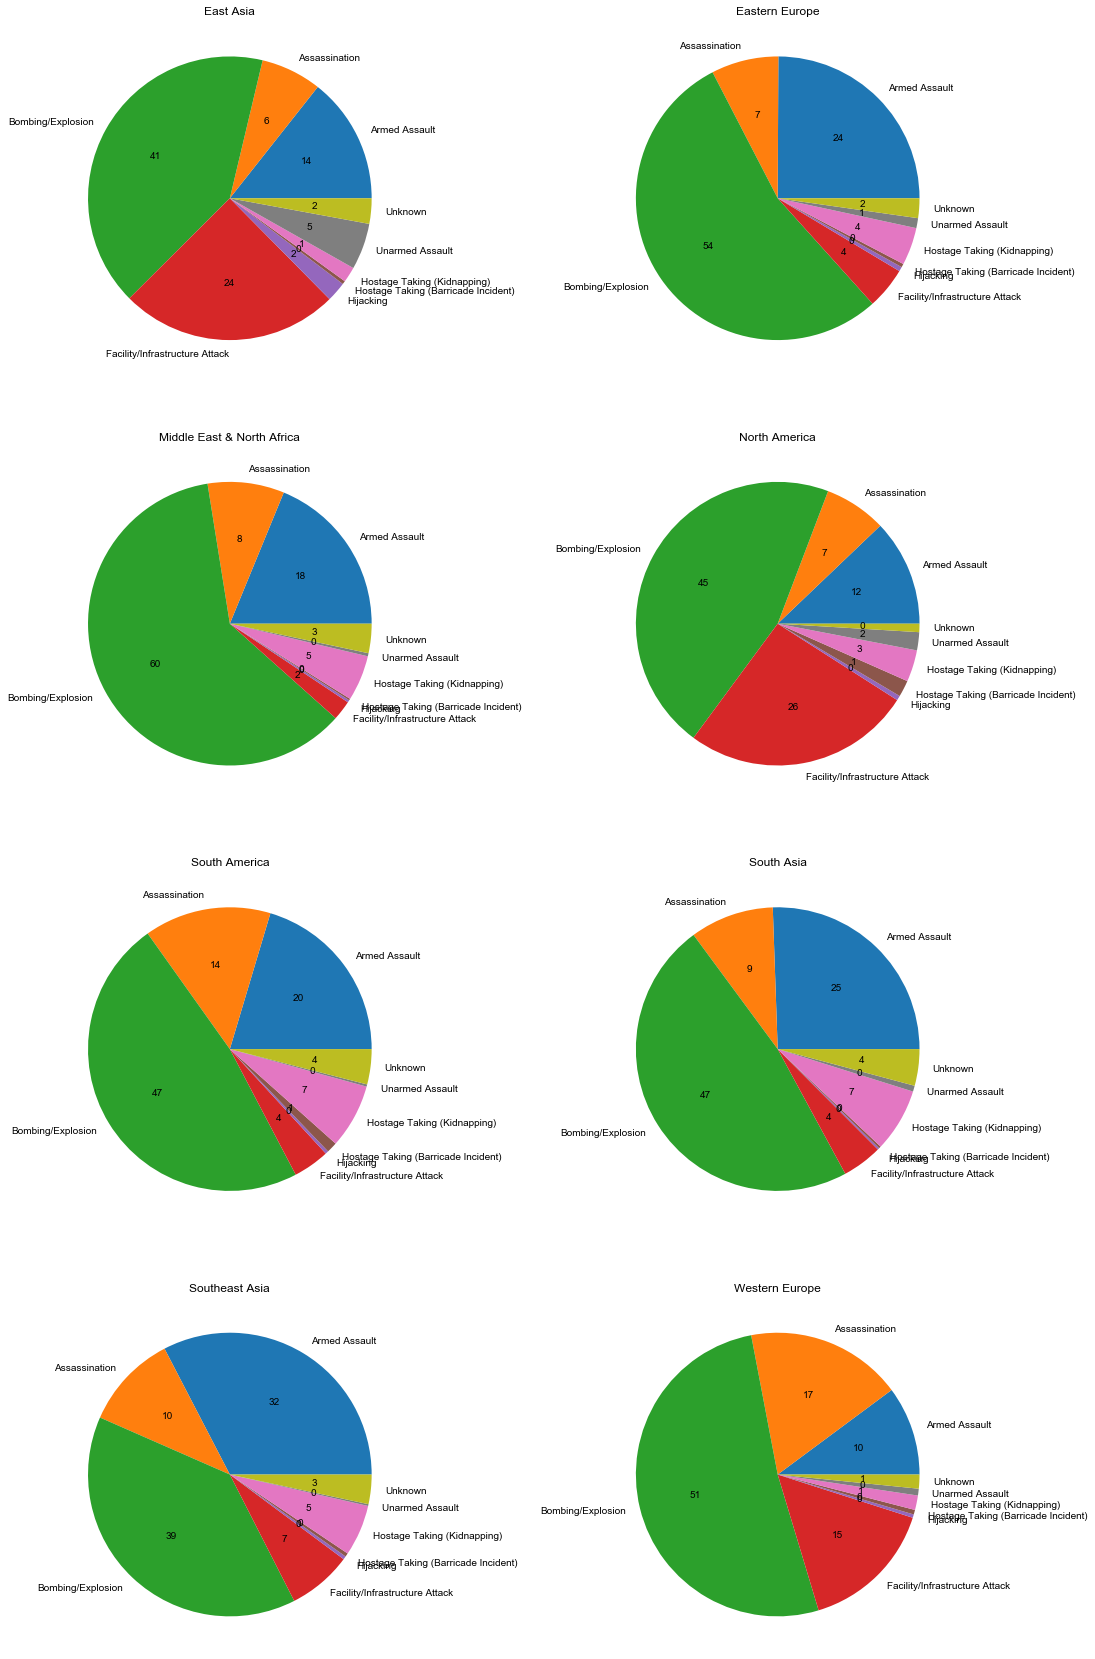

In [254]:
ratio0 = attack2.iloc[:, 0]
ratio1 = attack2.iloc[:, 1]
ratio2 = attack2.iloc[:, 2]
ratio3 = attack2.iloc[:, 3]
ratio4 = attack2.iloc[:, 4]
ratio5 = attack2.iloc[:, 5]
ratio6 = attack2.iloc[:, 6]
ratio7 = attack2.iloc[:, 7]

plt.figure(figsize=(18, 30))
plt.subplot(4, 2, 1)
plt.pie(ratio0, labels=label, autopct='%d')
plt.title(country[0])

plt.subplot(4, 2, 2)
plt.pie(ratio1, labels=label, autopct='%d')
plt.title(country[1])

plt.subplot(4, 2, 3)
plt.pie(ratio2, labels=label, autopct='%d')
plt.title(country[2])

plt.subplot(4, 2, 4)
plt.pie(ratio3, labels=label, autopct='%d')
plt.title(country[3])

plt.subplot(4, 2, 5)
plt.pie(ratio4, labels=label, autopct='%d')
plt.title(country[4])

plt.subplot(4, 2, 6)
plt.pie(ratio5, labels=label, autopct='%d')
plt.title(country[5])

plt.subplot(4, 2, 7)
plt.pie(ratio6, labels=label, autopct='%d')
plt.title(country[6])

plt.subplot(4, 2, 8)
plt.pie(ratio7, labels=label, autopct='%d')
plt.title(country[7])

plt.show()

- 폭발 테러가 가장 많이 발생했다.
- 대체로 무장습격이 두번째로 많은데, east asia/north america 지역은 Facility/infrastructure Attack 이 두번째로 많았고, western europe 지역은 Assassination과 Facility/infrastructure Attack 이 두번째로 많았다.

#### 지역별 사망자와 사상자 수

In [213]:
terror_sum = terror_country.groupby(by=['Region'], as_index=False).sum()

In [214]:
terror_sum = terror_sum[['Region', 'kill', 'wound', 'casualty']]
terror_sum

,Region,kill,wound,casualty
0,East Asia,1138.0,9147.0,9923.0
1,Eastern Europe,7311.0,11866.0,17955.0
2,Middle East & North Africa,125676.0,205250.0,310789.0
3,North America,4764.0,18893.0,23608.0
4,South America,28730.0,16522.0,43273.0
5,South Asia,93434.0,132032.0,217603.0
6,Southeast Asia,14819.0,25247.0,39200.0
7,Western Europe,6595.0,17706.0,22053.0


In [216]:
terror_sum.sort_values(by=['casualty'], ascending=False, inplace=True)

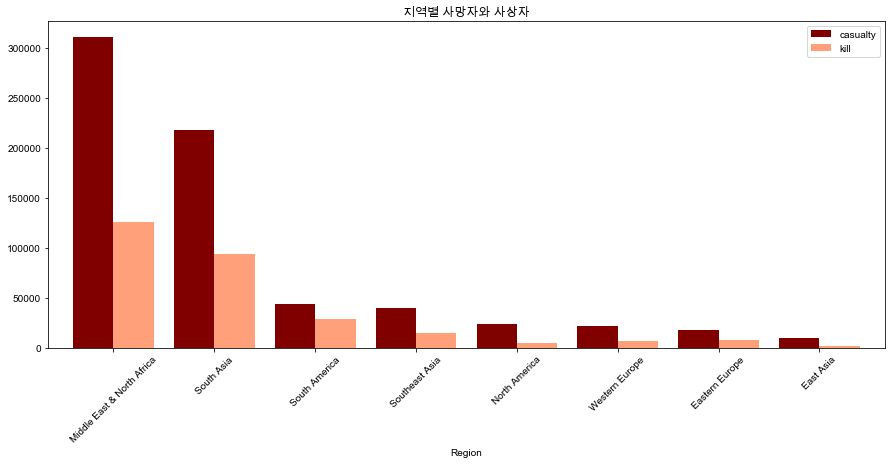

In [218]:
colors = ['#800000', '#FFA07A']

terror_sum.plot(x='Region', y=['casualty','kill'], kind='bar', figsize=(15,6), rot=45, color=colors, width=0.8)
plt.title('지역별 사망자와 사상자');

- 중동/북아프리카의 사상자 수가 가장 많다
- 위에 공격 유형별 시각화를 통해서 중동/북아프리카, 남아시아 순으로 테러가 많이 일어나는 것을 확인했고 그에 맞는 사상자 수 시각화 결과를 확인했다.

## 문제5)
• 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해 문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.   
• 그리고 본인의 분석결과를 제시하시오.
- 내가 특정 지은 시기: 2012-2014

In [258]:
terror_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143701 entries, 95 to 170268
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        143701 non-null  int64  
 1   Region      143701 non-null  object 
 2   AttackType  143701 non-null  object 
 3   TargetType  143701 non-null  object 
 4   kill        137719 non-null  float64
 5   wound       133551 non-null  float64
 6   casualty    133191 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.8+ MB


In [357]:
spec_period = terror_country[(terror_country['Year'] > 2010) & (terror_country['Year'] < 2016)]

In [358]:
spec_period.tail()

,Year,Region,AttackType,TargetType,kill,wound,casualty
156378,2015,Eastern Europe,Bombing/Explosion,Private Citizens & Property,0.0,0.0,0.0
156466,2015,Eastern Europe,Bombing/Explosion,Transportation,0.0,0.0,0.0
156657,2015,Eastern Europe,Bombing/Explosion,Military,1.0,0.0,1.0
156779,2015,Eastern Europe,Armed Assault,Tourists,1.0,11.0,12.0
156841,2015,Eastern Europe,Bombing/Explosion,Utilities,0.0,0.0,0.0


<AxesSubplot:xlabel='TargetType'>

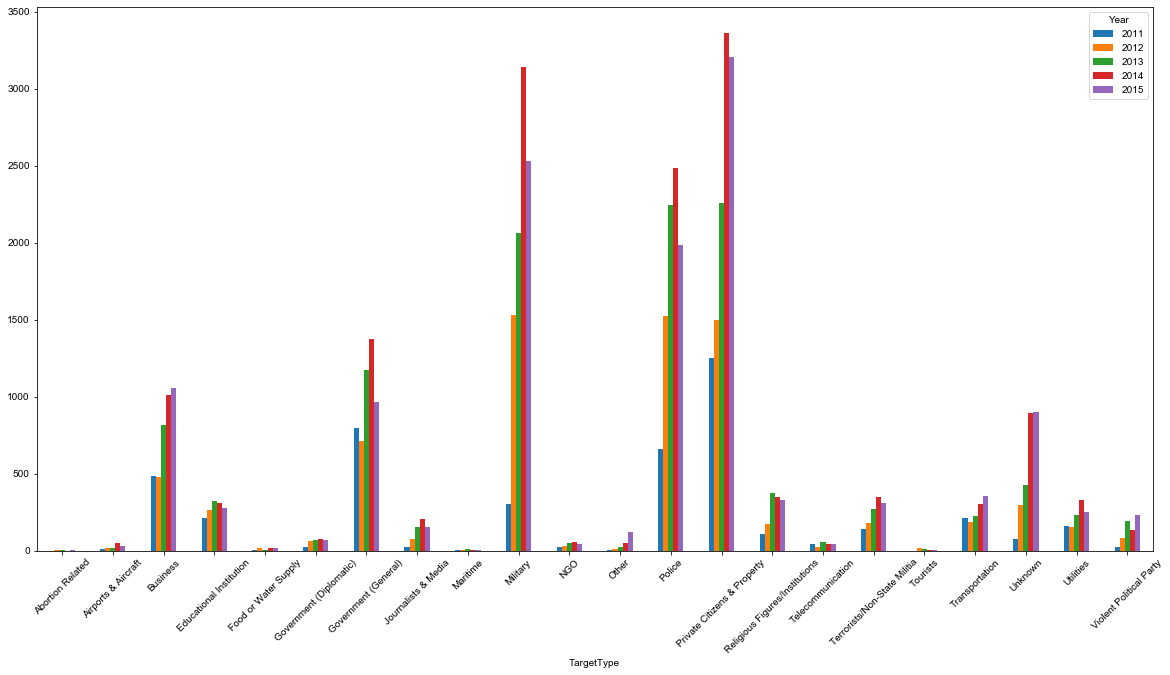

In [359]:
pd.crosstab([spec_period.TargetType], spec_period.Year).plot(kind='bar',figsize=(20,10), rot=45)
# pd.crosstab([spec_period.Year], spec_period.casualty.sum())
# pd.crosstab([spec_period.Year,spec_period.TargetType], spec_period.casualty.sum()).plot(kind='bar',figsize=(15,6), rot=45)

- Government, Military, police, private citizens & property
- 위 타겟들이 해당 기간에 테러 대상으로 급증하였다.
- 경제 불황에 따라 정부와 개인 시민/재산을 상대로 테러가 많이 일어났을 수 있다.

<AxesSubplot:xlabel='Region'>

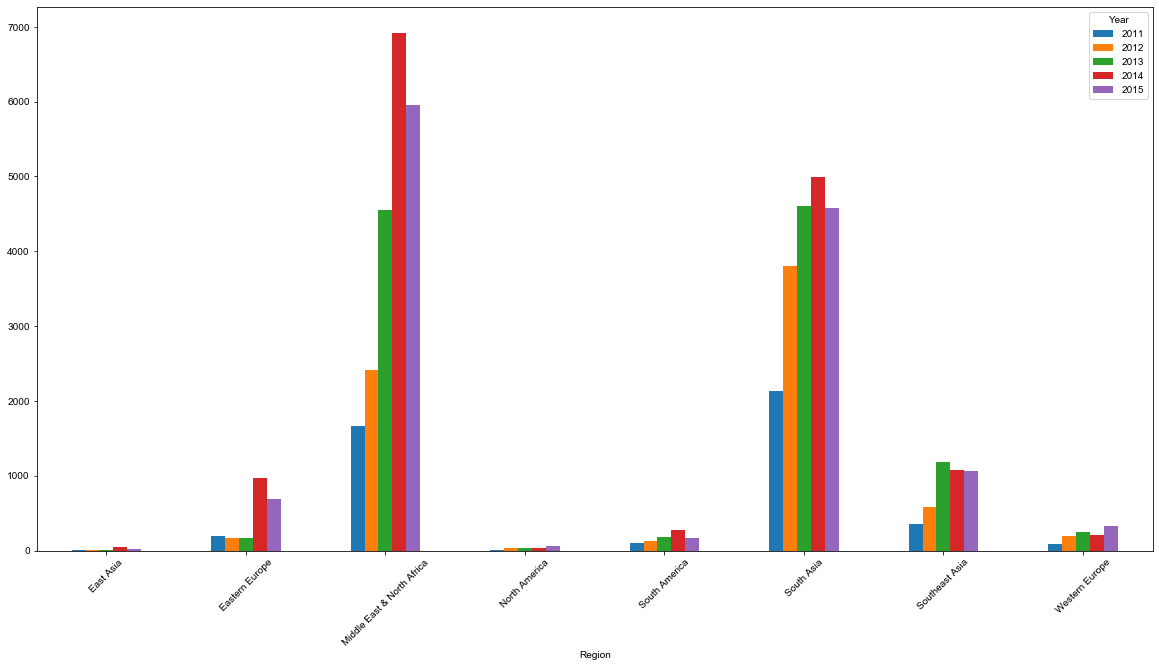

In [363]:
pd.crosstab([spec_period.Region], spec_period.Year).plot(kind='bar',figsize=(20,10), rot=45)

- 중동/북아프리카 테러가 증가했기 때문에 앞서 군사 대상 테러가 증가한 것으로 보인 것 같다.
- 경기 불황이 심했던 유럽은 일부 국가에서 14년도에 급증하였으나 전체가 아닌 것으로 보아 경기 불황이 테러의 주요 원인이라고 하기 어렵다.

## 문제6)
• 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석해보시오.

In [284]:
terror_country['Region'].unique()

array(['Middle East & North Africa', 'South Asia', 'Southeast Asia',
       'East Asia', 'South America', 'North America', 'Western Europe',
       'Eastern Europe'], dtype=object)

In [292]:
period_region = terror_country[terror_country['Region'] != 'South America']
period_region.head()

,Year,Region,AttackType,TargetType,kill,wound,casualty
95,1970,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,NaN
133,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,2.0,2.0
158,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0
195,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0
226,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0.0


In [293]:
period_region['Region'].unique()

array(['Middle East & North Africa', 'South Asia', 'Southeast Asia',
       'East Asia', 'North America', 'Western Europe', 'Eastern Europe'],
      dtype=object)

In [296]:
period_region['period'] = 0
period_region.head()

,Year,Region,AttackType,TargetType,kill,wound,casualty,period
95,1970,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,NaN,0
133,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,2.0,2.0,0
158,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,0
195,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,0
226,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0.0,0


In [299]:
year70 = period_region[(period_region['Year'] >= 1970) & (period_region['Year'] < 1980)]
year70['period'] = 1970
year70

,Year,Region,AttackType,TargetType,kill,wound,casualty,period
95,1970,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,NaN,1970
133,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,2.0,2.0,1970
158,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
195,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
226,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0.0,1970
...,...,...,...,...,...,...,...,...
4848,1977,Eastern Europe,Bombing/Explosion,Transportation,1.0,7.0,8.0,1970
5583,1977,Eastern Europe,Armed Assault,Business,0.0,0.0,0.0,1970
5694,1978,Eastern Europe,Bombing/Explosion,Transportation,4.0,0.0,4.0,1970
6324,1978,Eastern Europe,Assassination,Terrorists/Non-State Militia,0.0,1.0,1.0,1970


In [300]:
year80 = period_region[(period_region['Year'] >= 1980) & (period_region['Year'] < 1990)]
year80['period'] = 1980

In [301]:
year90 = period_region[(period_region['Year'] >= 1990) & (period_region['Year'] < 2000)]
year90['period'] = 1990

In [302]:
year00 = period_region[(period_region['Year'] >= 2000) & (period_region['Year'] < 2010)]
year00['period'] = 2000

In [303]:
year10 = period_region[(period_region['Year'] >= 2010) & (period_region['Year'] < 2020)]
year10['period'] = 2010

In [309]:
# set_period = pd.concat([set_period, year10])
# set_period

,Year,Region,AttackType,TargetType,kill,wound,casualty,period
95,1970,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,NaN,1970
133,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,2.0,2.0,1970
158,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
195,1970,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
226,1970,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0.0,1970
...,...,...,...,...,...,...,...,...
169985,2016,Eastern Europe,Armed Assault,Military,15.0,8.0,23.0,2010
170177,2016,Eastern Europe,Unknown,Police,2.0,1.0,3.0,2010
170178,2016,Eastern Europe,Unknown,Police,0.0,0.0,0.0,2010
170255,2016,Eastern Europe,Bombing/Explosion,Government (General),0.0,0.0,0.0,2010


In [311]:
set_period.drop(['Year'], axis=1, inplace=True)

,Region,AttackType,TargetType,kill,wound,casualty,period
95,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,NaN,1970
133,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,2.0,2.0,1970
158,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
195,Middle East & North Africa,Bombing/Explosion,Government (Diplomatic),0.0,0.0,0.0,1970
226,Middle East & North Africa,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0.0,1970
...,...,...,...,...,...,...,...
169985,Eastern Europe,Armed Assault,Military,15.0,8.0,23.0,2010
170177,Eastern Europe,Unknown,Police,2.0,1.0,3.0,2010
170178,Eastern Europe,Unknown,Police,0.0,0.0,0.0,2010
170255,Eastern Europe,Bombing/Explosion,Government (General),0.0,0.0,0.0,2010


In [320]:
set_period = set_period.fillna(0)

In [321]:
set_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124939 entries, 95 to 170268
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Region      124939 non-null  object 
 1   AttackType  124939 non-null  object 
 2   TargetType  124939 non-null  object 
 3   kill        124939 non-null  float64
 4   wound       124939 non-null  float64
 5   casualty    124939 non-null  float64
 6   period      124939 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.7+ MB


In [326]:
pd.crosstab([set_period.period, set_period.Region], set_period.kill.sum())

col_0                              253737.0
period Region                              
1970   East Asia                         78
       Eastern Europe                    25
       Middle East & North Africa      1073
       North America                   1592
       South Asia                        51
       Southeast Asia                   188
       Western Europe                  4671
1980   East Asia                        110
       Eastern Europe                    43
       Middle East & North Africa      2883
       North America                    557
       South Asia                      2870
       Southeast Asia                  1086
       Western Europe                  4768
1990   East Asia                        416
       Eastern Europe                  1062
       Middle East & North Africa      5426
       North America                    654
       South Asia                      4838
       Southeast Asia                  1644
       Western Europe                  3978
2000   East Asia                         89
       Eastern Europe                  1324
       Middle East & North Africa      8086
       North America                    268
       South Asia                      8019
       Southeast Asia                  2706
       Western Europe                  1401
2010   East Asia                        101
       Eastern Europe                  2577
       Middle East & North Africa     29043
       North America                    275
       South Asia                     25719
       Southeast Asia                  5829
       Western Europe                  1489

## 문제7)
• 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.  
• 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.

In [327]:
terror.head()

,Year,Month,Day,Country,Region,Provstate,City,lat,long,AttackType,TargetType,Target,kill,wound,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,NaN,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,NaN,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN


In [331]:
terror_top.head()

,Country,counts,kill,wound,casualty
84,Iraq,22130,71082.0,129437.0,200519.0
134,Pakistan,13634,22734.0,39925.0,62659.0
0,Afghanistan,11306,33146.0,38228.0,71374.0
80,India,10978,18842.0,28241.0,47083.0
35,Colombia,8163,14600.0,10199.0,24799.0
